In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [3]:
adult=pd.read_csv('Adult.data.csv')

In [4]:
adult.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [11]:
adult['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [22]:
Male=adult.query('sex=="Male"')
Male['age'].mean()
#To find the average age of men , we first query the sex column
male_data= adult.query('sex=="Male"')
# then we extract the age column and derive the mean   
average_age_male= male_data['age'].mean()
print(average_age_male)


39.43354749885268

In [8]:
# this provides the number of people with bacelors degree
len(adult[adult['education']=="Bachelors"])


5355

In [7]:
# this gives the total number of people on the data
len(adult)

32561

In [10]:
# we then determine the percentage of people with bachelors degree on the data
percentage_bachelor= round(len(adult[adult['education']=="Bachelors"])/len(adult)*100,1)
print(percentage_bachelor)

16.4


In [16]:
#  inquire the list of qualifications from the data
adult['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [59]:
# we specify the qualifications and query
lower_education= adult[~adult['education'].isin(["Bachelors","Masters","Doctorate"])]
higher_education= adult[adult['education'].isin(["Bachelors","Masters","Doctorate"])]

In [60]:
# first extract the people with low qualification but have high salary
Rich_low_quali= lower_education[lower_education['salary']==">50K"]
# find the percentage of this people with low qualification and high salary
percentage_rich_low_quali= round(len(Rich_low_quali)/len(lower_education)*100,1)
print(percentage_rich_low_quali)

17.4


In [61]:
# first extract the people with high qualification and have high salary
Rich_high_quali= higher_education[higher_education['salary']==">50K"]
# find the percentage of this people with high qualification and high salary
percentage_rich_high_quali= round(len(Rich_high_quali)/len(higher_education)*100,1)
print(percentage_rich_high_quali)


46.5


In [68]:
# input the minimum hours into a variable
minimum_hours=adult['hours-per-week'].min()
# find the people who work minimum hours
num_minimum_hours= adult[adult['hours-per-week']==minimum_hours]
# then find percentage of high earners among the people that work minimum hours
rich_percentage = round(len(num_min_hours[num_min_hours.salary==">50k"])/len(num_min_hours)*100,1)

10.0


In [81]:
# first we extract the top earners
rich_adult= adult[adult.salary==">50K"]
# then we check the country with most top earners
rich_adult_origin= rich_adult['native-country'].value_counts().idxmax()
print('Country with highest earners is',rich_adult_origin)
# we extract the number of top earners from this country
rich_adult_origin_max=rich_adult['native-country'].value_counts().max()
# then check for the percentage of rich adults from US against others
percentage_rich=round(rich_adult_origin_max/len(rich_adult)*100,1)
print('percentage of US rich amoung top earners is',percentage_rich )
# also check person US rich in the entire data
total_origin_count=adult['native-country'].value_counts().sum()
percentage=round(rich_adult_origin_max/total_origin_count*100,1)
print(percentage)



Country with highest earners is United-States
percentage of US rich amoung top earners is 91.5
22.0


In [59]:
# first extract from the data,people with origin india
people_from_india= adult[adult['native-country']=="India"]
# then extract the top earners
rich_from_india=people_from_india[people_from_india.salary==">50K"]
# then use the value count to find the number of occupatios and then idxmax to check for the most reoccuring profession
profession=rich_from_india['occupation'].value_counts().idxmax()
print(profession)

Prof-specialty


In [60]:
# here we queried for both people from india and those with high salary
people_of_india = adult[(adult['native-country']=="India")&(adult['salary']==">50K")]
# then checked for the number of occupations
occupation_counts = people_of_india['occupation'].value_counts()
# then checked for the highest earning profession
top_in_occupation= occupation_counts.idxmax()
print(top_in_occupation)

Prof-specialty


In [90]:
low_earners= adult[adult['salary']=="<=50K"]

In [91]:
low_earners['race'].value_counts()

White                 20699
Black                  2737
Asian-Pac-Islander      763
Amer-Indian-Eskimo      275
Other                   246
Name: race, dtype: int64

In [92]:
rich_adult= adult[adult.salary==">50K"]

In [93]:
rich_adult['race'].value_counts()

White                 7117
Black                  387
Asian-Pac-Islander     276
Amer-Indian-Eskimo      36
Other                   25
Name: race, dtype: int64

In [97]:
blacks= adult.query('race== "Black"')

In [99]:
blacks['education'].value_counts()

HS-grad         1174
Some-college     746
Bachelors        330
11th             153
10th             133
Assoc-voc        112
Assoc-acdm       107
9th               89
Masters           86
12th              70
7th-8th           56
5th-6th           21
1st-4th           16
Prof-school       15
Doctorate         11
Preschool          5
Name: education, dtype: int64

In [102]:
pd.pivot_table(adult,index='sex', values="hours-per-week")

,hours-per-week
sex,
Female,36.410361
Male,42.428086


<AxesSubplot:xlabel='sex', ylabel='age'>

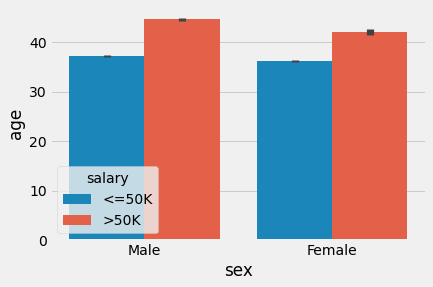

In [105]:
sns.barplot(x='sex',y= 'age', hue='salary', data=adult)

In [85]:
b = np.array([[1.0,2.0,3.0],[3.0,4.0,5.0]])
print(b)

[[1. 2. 3.]
 [3. 4. 5.]]
